In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")


In [2]:
study_2 = pd.read_csv("Data/study_2.csv")
study_2.head(5)

,country,kg/person_2017,alcconsumption,both.sexes,male,female
0,United States of America,121.00,9.70,37.3,36.5,38.2
1,Australia,114.26,10.21,30.4,30.7,30.1
2,Argentina,112.17,9.35,28.5,27.4,29.6
3,Brazil,99.36,10.08,22.3,18.5,25.9
4,Israel,97.82,2.52,26.7,26.1,27.2


In [3]:
my_sample = study_2[:10]
'''
para realizar el estudio me voy a quedar con los 10 países que más carne consumen, he tenido que hacerlo
con Pandas por un problema con la coxesión de SQL, en la carpeta Figures hay una imagen con la query
''' 
my_sample

,country,kg/person_2017,alcconsumption,both.sexes,male,female
0,United States of America,121.00,9.70,37.3,36.5,38.2
1,Australia,114.26,10.21,30.4,30.7,30.1
2,Argentina,112.17,9.35,28.5,27.4,29.6
3,Brazil,99.36,10.08,22.3,18.5,25.9
4,Israel,97.82,2.52,26.7,26.1,27.2
5,Samoa,97.76,4.51,45.5,38.2,53.2
6,Saint Vincent and the Grenadines,93.38,4.99,23.8,16.7,31.0
7,Saint Lucia,91.82,12.05,19.8,12.0,27.2
8,Portugal,90.99,13.89,23.2,22.1,24.2
9,Canada,90.09,10.20,31.3,31.2,31.5


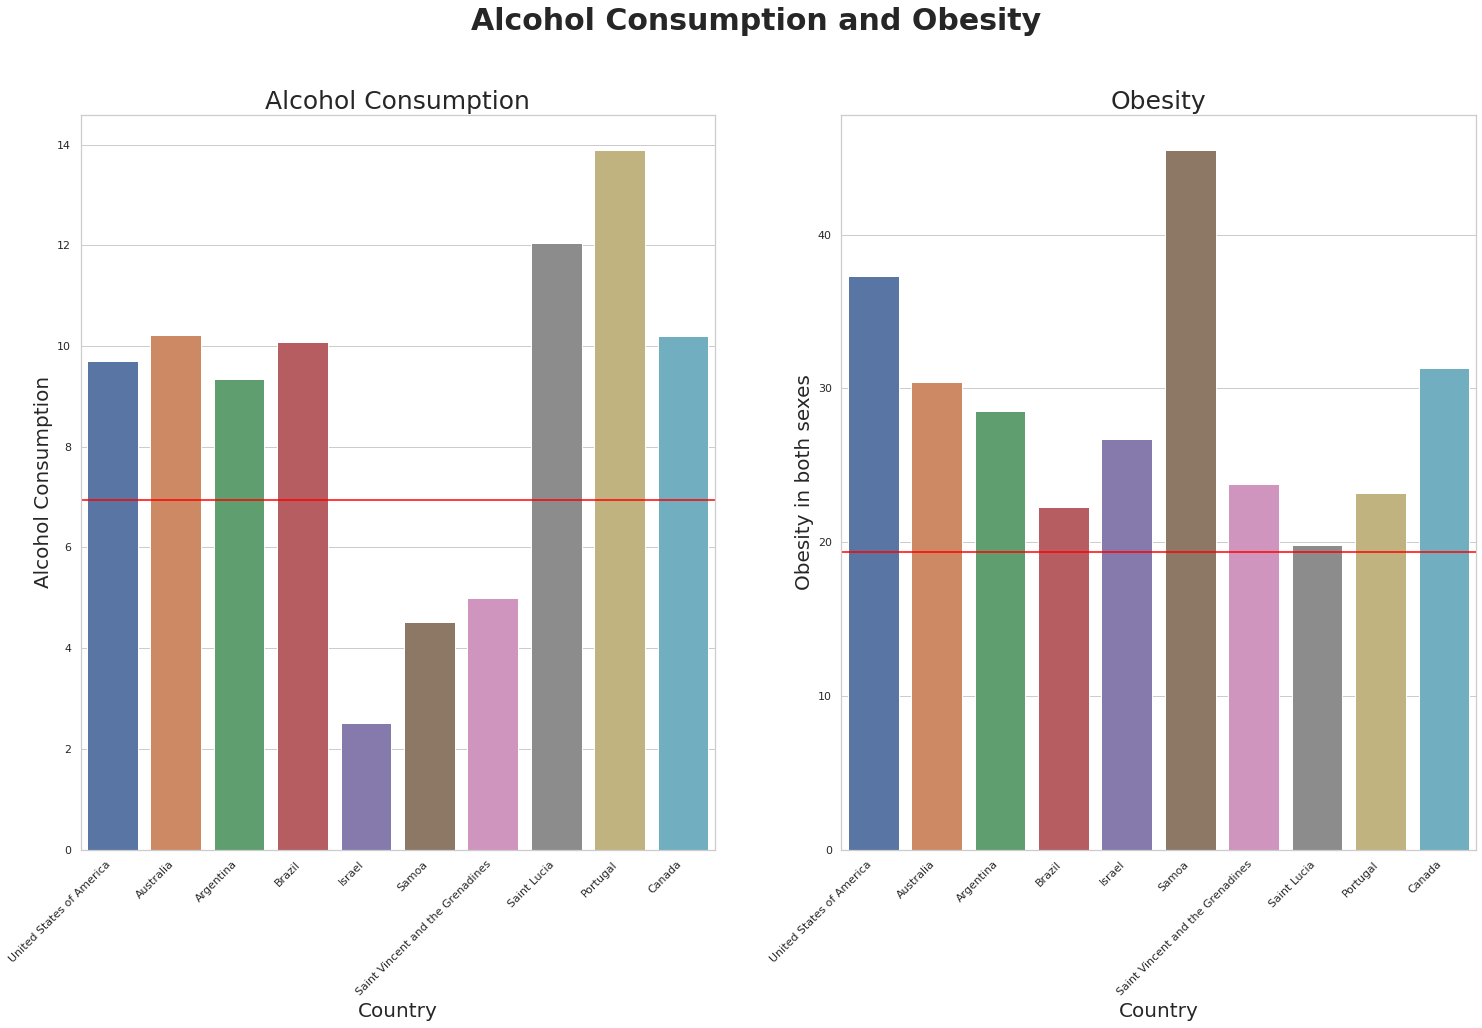

In [4]:
sub_plot1 = figura, eje = plt.subplots(nrows=1, ncols=2, figsize=(25,15))
figura.suptitle('Alcohol Consumption and Obesity', fontsize = 30, fontweight="bold")
eje[0].set_title('Alcohol Consumption',fontsize = 25)
eje[1].set_title('Obesity',fontsize = 25)
alcohol_plot = sns.barplot(x = "country",y = "alcconsumption", data = my_sample, ax=eje[0])
alcohol_plot.axhline(y=study_2.alcconsumption.mean(), c="red", label="mean")
alcohol_plot.set_xlabel("Country", fontsize = 20)
alcohol_plot.set_ylabel("Alcohol Consumption", fontsize = 20)
obesity_plot = sns.barplot(x = "country", y = "both.sexes", data = my_sample, ax=eje[1])
obesity_plot.axhline(y=study_2["both.sexes"].mean(), c="red", label="mean")
obesity_plot.set_xlabel("Country", fontsize = 20)
obesity_plot.set_ylabel("Obesity in both sexes", fontsize = 20)
figura.autofmt_xdate(rotation=45);
figura.savefig("Figures/Alcohol Consumption and Obesity.jpg")

En estos dos gráficos, podemos ver los 10 países que más consumen carne y los datos de obesidad y consumo de alcohol en los mismos. Se observa que en el caso de la obesidad, todos están por encima de la media del resto de países. 
En cuanto al consumno de alcohol, no está tan clara la relación. Siete de los 10 países están bastante por encima de la media y los tres restantes por debajo. Por lo que la relación no queda clara.

In [5]:
study_2.describe()

,kg/person_2017,alcconsumption,both.sexes,male,female
count,143.000000,141.000000,142.000000,142.000000,142.000000
mean,48.192937,6.934113,19.328169,15.986620,22.661972
std,29.078554,4.738190,9.611653,9.793008,10.402044
min,3.970000,0.050000,2.900000,1.500000,3.800000
25%,20.645000,2.760000,9.925000,5.425000,14.075000
50%,44.690000,6.560000,21.850000,16.700000,24.150000
75%,74.300000,10.160000,26.000000,24.075000,29.325000
max,121.000000,18.850000,45.600000,41.200000,53.200000


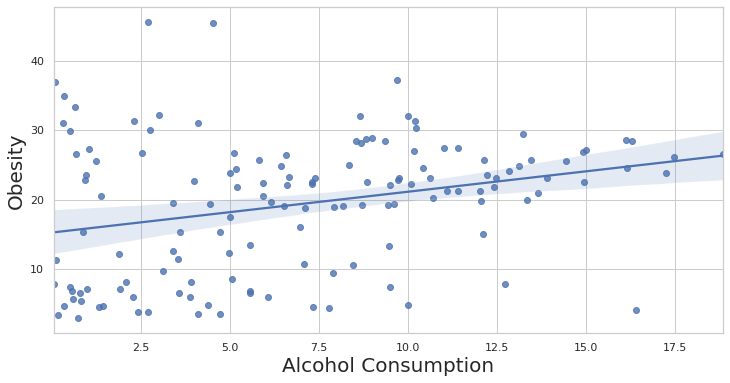

In [6]:
alcohol_plot_2 = sns.regplot(x="alcconsumption", y="both.sexes", data=study_2)
alcohol_plot_2.set_ylabel("Obesity", fontsize = 20)
alcohol_plot_2.set_xlabel("Alcohol Consumption", fontsize = 20)
figura.savefig("Figures/alcohol_plot_2.jpg")

En este gráfico se plasma la relación entre consumo de alcohol y obesidad. Queda claro que no existe relación entre 
estas dos variables al verse los datos dispersos por toda la tabla.